In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv("../parkinsons.data")

In [3]:
#set index as "name"
df.set_index("name", inplace=True)

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, QuantileTransformer, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.pipeline import Pipeline

In [5]:
abs_z_score = np.abs(stats.zscore(df)) #get absolute z score
filt = (abs_z_score < 3).all(axis=1) #filter where abs_z_score is smaller than 3
df = df[filt] #remove outliners
df.shape

(181, 23)

In [6]:
# X: features, y:target
X = df.drop(columns=["status"]).values
y = df["status"].values

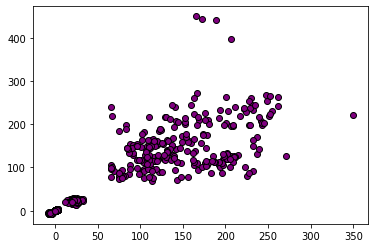

In [7]:
plt.scatter(X[:90, :], X[91:, :], edgecolors="black", c="purple")

In [8]:
standard_X = StandardScaler().fit_transform(X)
quantile_X = QuantileTransformer(n_quantiles=100).fit_transform(X)
minmax_X = MinMaxScaler().fit_transform(X)
maxabs_X = MaxAbsScaler().fit_transform(X)
robust_X = RobustScaler().fit_transform(X)
scalers = [standard_X, quantile_X, minmax_X, maxabs_X, robust_X]
names = ["StandardScaler", "QuantileTransformer", "MinMaxScaler", "MaxAbsScaler", "RobustScaler"]

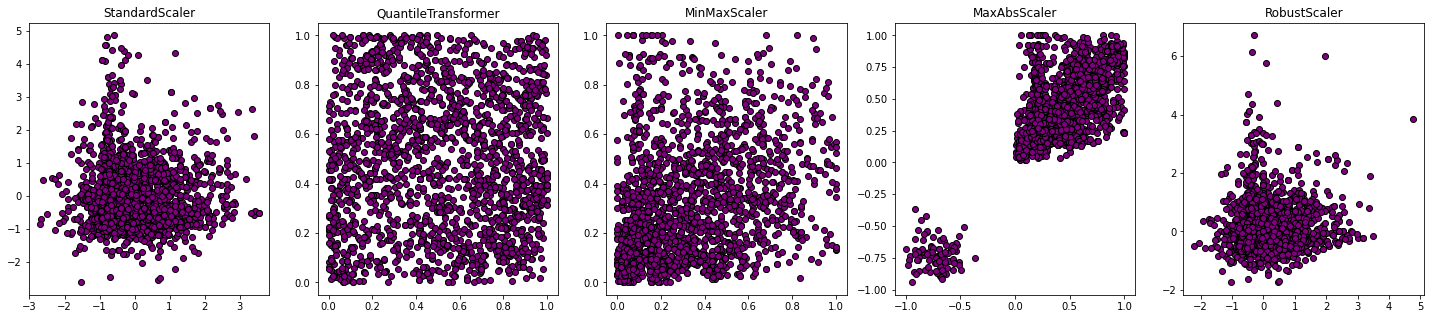

In [9]:
fig, axes = plt.subplots(1,5, figsize=(25,5))
axes = axes.flatten()
for i, scaler in enumerate(scalers):
    axes[i].scatter(scaler[:90, :], scaler[91:, :], edgecolors="black", c="purple")
    axes[i].set_title(names[i])

In [10]:
from sklearn.svm import SVC

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# svm_test = SVC(kernel="linear")
# svm_test.fit(X_train, y_train)
# coef = svm_test.coef_
# features = np.where(coef>0)
# features

In [13]:
# df_new = df.iloc[:, features[1]]
# df_new

In [14]:
#X_new = df_new.values

In [15]:
#X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [16]:
svm_pipe = Pipeline([("scale", StandardScaler()),("model", SVC())])
svm_pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', SVC())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': SVC(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__C': 1.0,
 'model__break_ties': False,
 'model__cache_size': 200,
 'model__class_weight': None,
 'model__coef0': 0.0,
 'model__decision_function_shape': 'ovr',
 'model__degree': 3,
 'model__gamma': 'scale',
 'model__kernel': 'rbf',
 'model__max_iter': -1,
 'model__probability': False,
 'model__random_state': None,
 'model__shrinking': True,
 'model__tol': 0.001,
 'model__verbose': False}

In [17]:
param_grid = {"model__kernel": ["rbf", "linear", "poly", "sigmoid"],
              "model__C": [0.1, 1, 10],
              "model__gamma": [0.001, 0.01, 0.1, 1, "auto", "scale"],
              "model__decision_function_shape": ["ovr", "ovo"]}

In [18]:
search = GridSearchCV(estimator=svm_pipe, cv=5, param_grid=param_grid)

In [19]:
search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', SVC())]),
             param_grid={'model__C': [0.1, 1, 10],
                         'model__decision_function_shape': ['ovr', 'ovo'],
                         'model__gamma': [0.001, 0.01, 0.1, 1, 'auto', 'scale'],
                         'model__kernel': ['rbf', 'linear', 'poly', 'sigmoid']})

In [20]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__decision_function_shape,param_model__gamma,param_model__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002403,0.001020,0.000724,0.000175,0.1,ovr,0.001,rbf,"{'model__C': 0.1, 'model__decision_function_sh...",0.769231,0.76,0.76,0.76,0.76,0.761846,0.003692,103
1,0.001496,0.000221,0.000460,0.000037,0.1,ovr,0.001,linear,"{'model__C': 0.1, 'model__decision_function_sh...",0.961538,1.00,0.88,0.84,0.80,0.896308,0.074456,21
2,0.001165,0.000040,0.000404,0.000021,0.1,ovr,0.001,poly,"{'model__C': 0.1, 'model__decision_function_sh...",0.769231,0.76,0.76,0.76,0.76,0.761846,0.003692,103
3,0.001089,0.000025,0.000354,0.000012,0.1,ovr,0.001,sigmoid,"{'model__C': 0.1, 'model__decision_function_sh...",0.769231,0.76,0.76,0.76,0.76,0.761846,0.003692,103
4,0.001072,0.000027,0.000440,0.000005,0.1,ovr,0.01,rbf,"{'model__C': 0.1, 'model__decision_function_sh...",0.769231,0.76,0.76,0.76,0.76,0.761846,0.003692,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.000949,0.000042,0.000315,0.000003,10,ovo,auto,sigmoid,"{'model__C': 10, 'model__decision_function_sha...",0.730769,0.84,0.76,0.84,0.72,0.778154,0.052166,95
140,0.001082,0.000037,0.000384,0.000005,10,ovo,scale,rbf,"{'model__C': 10, 'model__decision_function_sha...",0.961538,0.92,0.88,0.88,0.88,0.904308,0.032540,17
141,0.002347,0.001241,0.000305,0.000004,10,ovo,scale,linear,"{'model__C': 10, 'model__decision_function_sha...",0.884615,1.00,0.92,0.68,0.76,0.848923,0.114536,65
142,0.001058,0.000060,0.000316,0.000003,10,ovo,scale,poly,"{'model__C': 10, 'model__decision_function_sha...",0.884615,0.96,0.88,0.80,0.88,0.880923,0.050630,51


In [21]:
print(f"Best parameters: {search.best_params_},\nBest score: {search.best_score_}")

Best parameters: {'model__C': 10, 'model__decision_function_shape': 'ovr', 'model__gamma': 0.1, 'model__kernel': 'rbf'},
Best score: 0.952


In [22]:
svm_model = search.best_estimator_

In [23]:
svm_model.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', SVC(C=10, gamma=0.1))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': SVC(C=10, gamma=0.1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__C': 10,
 'model__break_ties': False,
 'model__cache_size': 200,
 'model__class_weight': None,
 'model__coef0': 0.0,
 'model__decision_function_shape': 'ovr',
 'model__degree': 3,
 'model__gamma': 0.1,
 'model__kernel': 'rbf',
 'model__max_iter': -1,
 'model__probability': False,
 'model__random_state': None,
 'model__shrinking': True,
 'model__tol': 0.001,
 'model__verbose': False}

In [24]:
svm_model.fit(X_train, y_train)
predicts = svm_model.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix

In [26]:
print(accuracy_score(y_test, predicts))

0.8909090909090909


[[11  5]
 [ 1 38]]


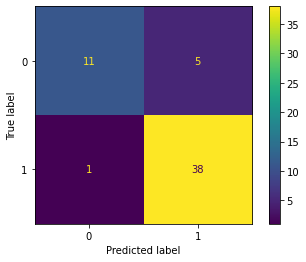

In [27]:
print(confusion_matrix(y_test, predicts))
plot_confusion_matrix(svm_model, X_test, y_test)
plt.show()

In [28]:
print(classification_report(y_test, predicts))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79        16
           1       0.88      0.97      0.93        39

    accuracy                           0.89        55
   macro avg       0.90      0.83      0.86        55
weighted avg       0.89      0.89      0.89        55

